# Исследование успешности видеоигр

Представим, что мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.   
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).   
Проведём исследование, чтобы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.   
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й.   

## 1. Откроем файл с данными и изучим общую информацию

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('games.csv')
display(data.head(10))
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1243,Dead Space 2,X360,2011.0,Shooter,0.94,0.44,0.00,0.13,90.0,8.6,M
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005.0,Adventure,0.12,0.09,0.00,0.03,NaN,7,EC
14348,Gotouchi Kenkei DS,DS,2006.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7433,Batman Begins,XB,2005.0,Action,0.16,0.04,0.00,0.01,65.0,7.1,T
537,Skylanders: Spyro's Adventure,Wii,2011.0,Action,1.35,1.13,0.00,0.30,81.0,5.6,E10+


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из полученной документации мы знаем, что столбцы содержат следующие значения:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию (например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»).

Заменим названия столбцов (приведём к нижнему регистру):

In [20]:
data.columns= data.columns.str.lower()

## 2. Подготовим данные для исследования

### 2.1. Преобразуем данные в нужные типы   
Преобразования данные в столбце `user_score`.

Предварительно ознакомимся с уникальными значениями столбца `user_score`. Возможно, в нём содержатся текстовые значения.

In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Мы видим значение **"tbd"**, которое чаще всего встречается в датасете. Скорее всего, это аббревиатура "to be determined", что может означать, что пользователь не указал свою оценку.   
С помощью метода to_numeric изменим тип данных на float, а вместо "tbd" пока оставим пропуски.

In [23]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

### 2.2. Обработаем пропуски

Посмотрим на два пропуска в столбце `name`.

In [24]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы не знаем, что это за игры, так как у нас нет их названия. В строках также нет информации о жанре и оценках, практически нулевые покатели продаж, далекий 1993 год релиза. Удалим эти строки.

In [25]:
data = data[~data['name'].isna()]

Рассмотрим пропуски в столбце `year_of_release`.

In [26]:
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Скорее всего, пропуски в данном столбце относятся к старым играм. По некоторым играм дату релиза можно определить из названия или просто найти эту информацию в Интернете.   
Оставим пока эти пропуски, так как, вероятнее всего, эти игры не потребуются нам для анализа.

Пропуски в столбцах `critic_score`,	`user_score`, вероятнее всего, вызваны тем, что по этим играм нет соответствующих данных. Оставим пропуски, так как оценки достаточно индивидуальный и субъективный параметр, и вместо них не стоит ставить какие-либо общие значения.

Пропуски в столбце `rating`, скорее всего, означают, что ESRB не выставляла оценку игре. Заполним пропуски текстовым значением 'unknown'.

In [27]:
data['rating'] = data['rating'].fillna('unknown')

Посчитаем суммарные продажи во всех регионах и запишем в отдельный столбец `total_sales`.

In [28]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Мы исключили из датасета две безымянные игры, изменили типы данных и заполнили пропуски в некоторых столбцах. Теперь можно переходить к исследованию. 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


## 3. Исследовательский анализ данных

На этом этапе мы ответим на следующие вопросы:
1) Сколько игр выпускалось в разные годы? За какие годы нам нужны данные, чтобы сделать прогноз на 2017 год?      
2) Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?   
3) Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ   
4) Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам    
5) Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?   
6) Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?   

### 3.1. Сколько игр выпускалось в разные годы? За какие годы нам нужны данные, чтобы сделать прогноз на 2017 год?

In [30]:
import matplotlib.pyplot as plt

Построим гистограмму по годам релиза.

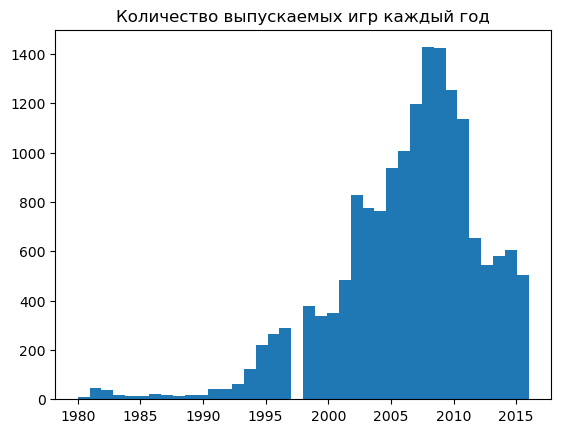

In [31]:
plt.hist(data['year_of_release'], bins=len(data['year_of_release'].unique()));
plt.title('Количество выпускаемых игр каждый год')
plt.show()

С начала 2000-х годов до 2009 года наблюдается стремительный рост количества выпускаемых игр. В 2008 и 2009 годах выпустили примерно по 1400 игр. Однако уже в 2012 году количество выпускаемых игр в год стало около 600.   

В целях дальнейшего анализа сохраним отдельный датасет **с данными с 2012 года**, которые не включают данные по старым играм, а также бум выпуска видеоигр в конце 2000-х годов.

In [32]:
data2 = data.query('year_of_release > 2011')

### 3.2. Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?   

Посмотрим, как менялись продажи по платформам. Для этого сделаем следующее:
1) Выберем платформы с наибольшими суммарными продажами;   
2) Построим сводную таблицу по выбранным платформам с общей суммой продаж по каждому году;   
3) Визуализируем результаты и сделаем вывод.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [34]:
data_platform_total_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
data_platform_total_sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Первые 6 платформ существенно выше других по суммарным продажам. Возьмём их для анализа.

In [35]:
platform_names = data_platform_total_sales.loc[0:5, 'platform'].tolist()

In [36]:
top_plaforms_sales_grouped = data.query('platform in @platform_names').pivot_table(\
                                        index='year_of_release', columns='platform', \
                                        values='total_sales', aggfunc='sum')\
                                        .reset_index()


In [37]:
top_plaforms_sales_grouped

platform,year_of_release,DS,PS,PS2,PS3,Wii,X360
0,1985.0,0.02,NaN,NaN,NaN,NaN,NaN
1,1994.0,NaN,6.03,NaN,NaN,NaN,NaN
2,1995.0,NaN,35.96,NaN,NaN,NaN,NaN
3,1996.0,NaN,94.70,NaN,NaN,NaN,NaN
4,1997.0,NaN,136.17,NaN,NaN,NaN,NaN
5,1998.0,NaN,169.49,NaN,NaN,NaN,NaN
6,1999.0,NaN,144.53,NaN,NaN,NaN,NaN
7,2000.0,NaN,96.37,39.17,NaN,NaN,NaN
8,2001.0,NaN,35.59,166.43,NaN,NaN,NaN
9,2002.0,NaN,6.67,205.38,NaN,NaN,NaN


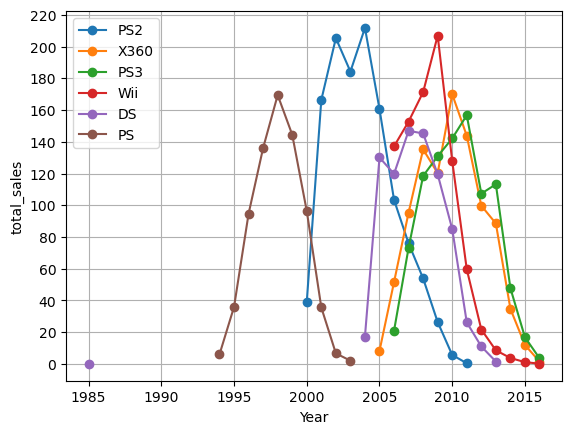

In [38]:
for plot in platform_names :
    plt.plot(top_plaforms_sales_grouped['year_of_release'], top_plaforms_sales_grouped[plot], 'o-', label=str(plot))

plt.xlabel('Year') 
plt.ylabel('total_sales')
plt.legend()
plt.yticks(range(0, 230, 20))
plt.grid()
plt.show()

На этом графике отчетливо видно, на какие годы приходятся пик и падение продаж для каждой из выбранных платформ:
- PS - рост в течение 4 лет, уход с рынка в течение 5 лет;
- PS2 - рост в течение 4 лет, уход с рынка в течение 6 лет;
- Wii - рост в течение 3 лет, уход с рынка в течение 4 лет;
- X360 - рост в течение 5 лет, уход с рынка в течение 5 лет;
- PS3 - рост в течение 5 лет, уход с рынка в течение 5 лет;
- DS - рост в течение 3 лет, уход с рынка в течение 5 лет.

Таким образом, самые успешные платформы появляются на рынке и **достигают своего пика в течение 3-5 лет**, а следующие **4-6 лет продажи падают до минимальных значений**.

### 3.3. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ

Далее мы будем использовать только данные с 2012 года.

1) Составим таблицу с данным по общим продажам по каждой платформе;   
2) Составим таблицу с данными по общим продажам на платформах в каждом году;   
3) Визуализируем данные, чтобы определить, какие платформы показывают положительную динамику к концу периода.

In [39]:
data2_platform_total_sales = data2.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
data2_platform_total_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


In [40]:
data2_platforms_sales_grouped = data2.pivot_table(index='year_of_release', columns='platform', \
                                        values='total_sales', aggfunc='sum')\
                                        .reset_index()
data2_platforms_sales_grouped

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
4,2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


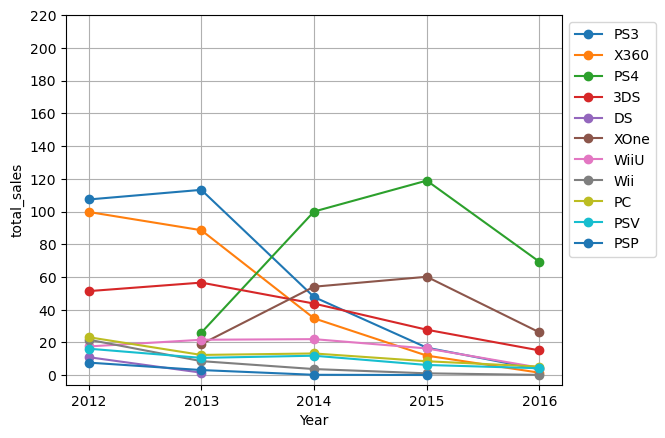

In [41]:
for plot in data2['platform'].unique() :
    plt.plot(data2_platforms_sales_grouped['year_of_release'], data2_platforms_sales_grouped[plot], 'o-', label=str(plot))

plt.xlabel('Year') 
plt.ylabel('total_sales')
plt.yticks(range(0, 230, 20))
plt.xticks(data2_platforms_sales_grouped['year_of_release'].tolist())
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

В документации к данным было указано, что данные не за весь 2016. Поэтому падение продаж в 2016 году на графике не означает реальное падение продаж игр на платформах. Для выбора потенциально прибыльных платформ нужно обратить внимание на рост продаж до 2015 года.   
Таких платформ две - **PS4 и XOne**.

### 3.4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Построим ящик для каждой платформы актуального периода и сравним результаты.

In [42]:
import seaborn as sns

PS3
count    493.000000
mean       0.585781
std        1.462855
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


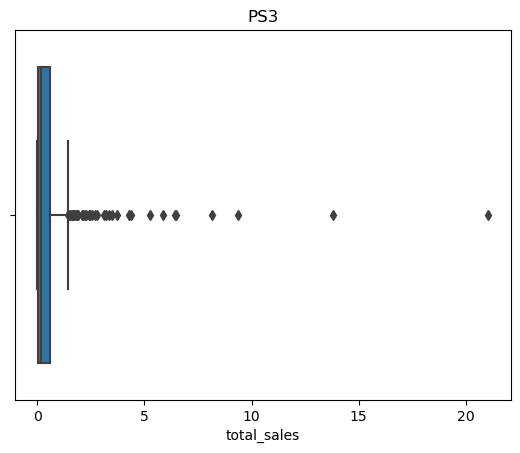

X360
count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


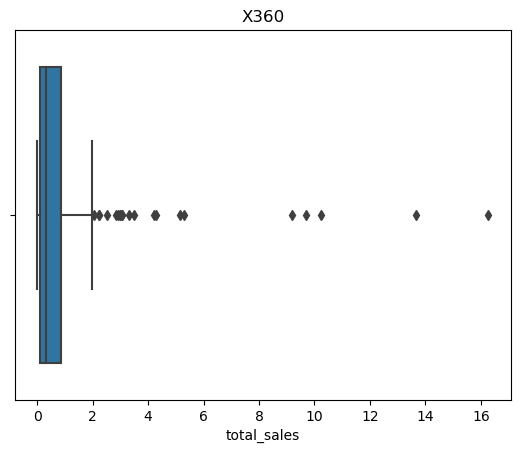

PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


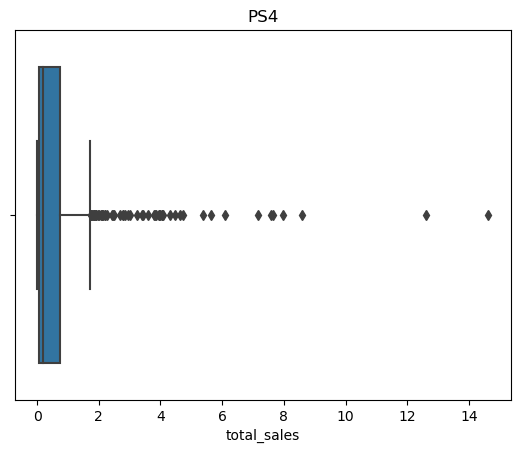

3DS
count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


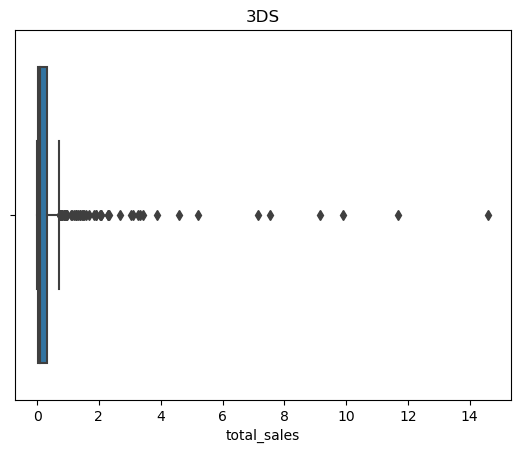

DS
count    31.000000
mean      0.404839
std       1.439245
min       0.010000
25%       0.020000
50%       0.050000
75%       0.185000
max       8.060000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


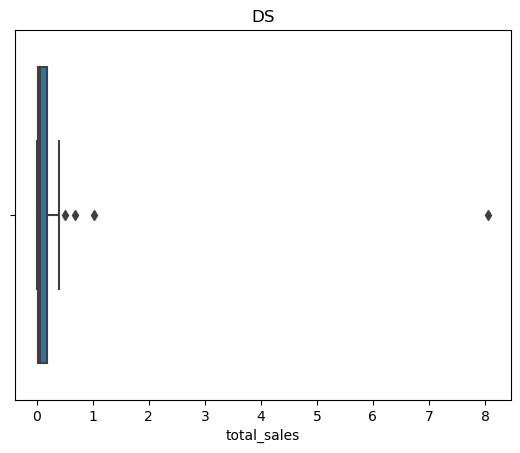

XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


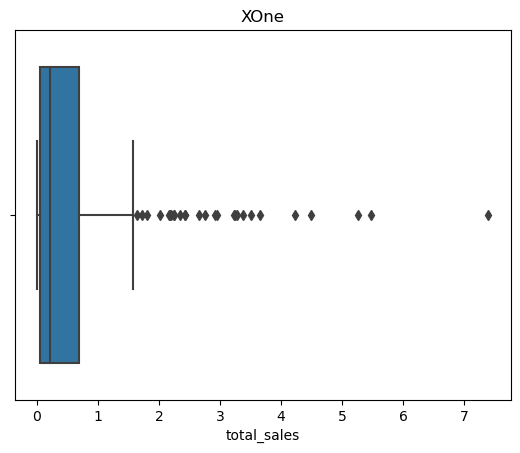

WiiU
count    147.000000
mean       0.559116
std        1.058836
min        0.010000
25%        0.080000
50%        0.220000
75%        0.525000
max        7.090000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


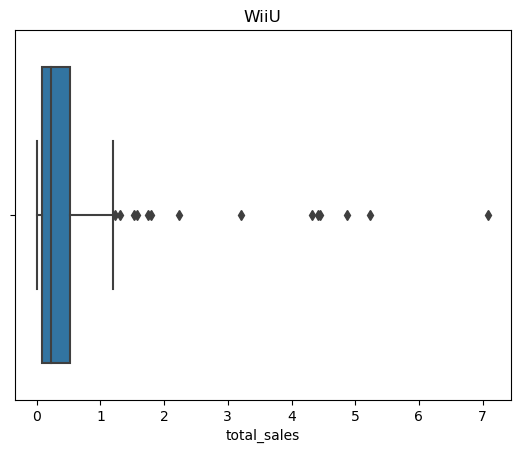

Wii
count    54.000000
mean      0.655000
std       1.165447
min       0.010000
25%       0.062500
50%       0.180000
75%       0.687500
max       6.760000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


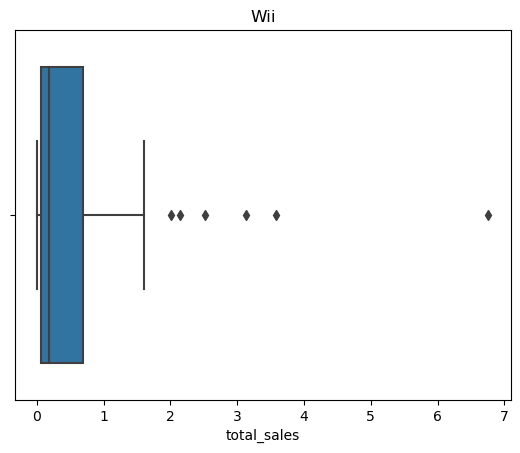

PC
count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


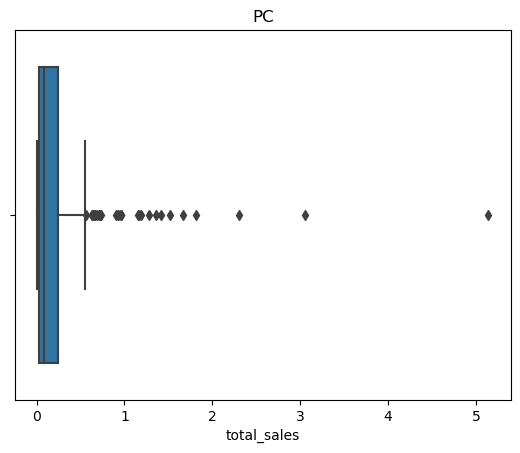

PSV
count    411.000000
mean       0.119659
std        0.203011
min        0.010000
25%        0.020000
50%        0.050000
75%        0.120000
max        1.960000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


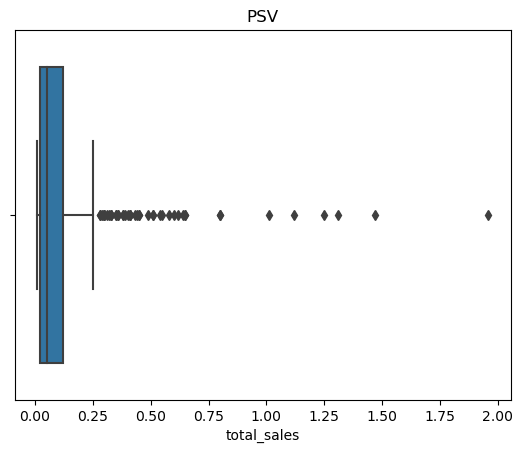

PSP
count    173.000000
mean       0.064682
std        0.071296
min        0.010000
25%        0.020000
50%        0.030000
75%        0.090000
max        0.360000
Name: total_sales, dtype: float64


/Users/Roman/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


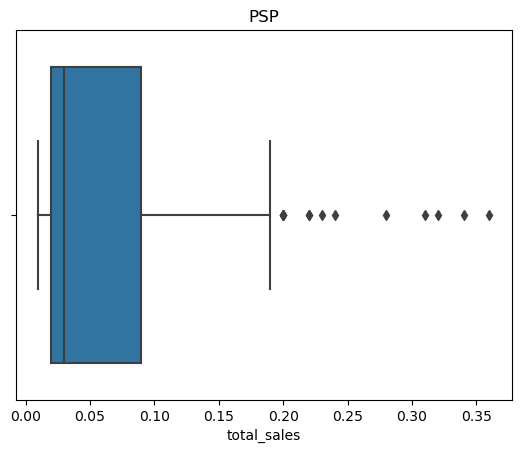

In [43]:
for plat in data2['platform'].unique() :
    print(str(plat))
    print(data2.query('platform == @plat')['total_sales'].describe())
    sns.boxplot(data2.query('platform == @plat')['total_sales']).set(title=str(plat))
    plt.show()

* PS3: медианное значение - 200 тыс. копий. В межквартильный размах входят показатели от 50 тыс. до 610 тыс. копий. Четыре рекордных показателя - 8,9,14 и 21 млн копий;
* X360: медианное значение - 310 тыс. копий. В межквартильный размах входят показатели от 100 тыс. до 870 тыс. копий. Три рекордных показателя - 10.5, 14, и 16 млн копий;
* PS4: медианное значение - 200 тыс. копий. В межквартильный размах входят показатели от 60 тыс. до 730 тыс. копий. Три рекордных показателя - 8.5, 12.5 и 14.6 млн копий;
* 3DS: медианное значение - 110 тыс. копий. В межквартильный размах входят показатели от 40 тыс. до 312 тыс. копий. Три рекордных показателя - 10, 12 и 14.6 млн копий;
* DS: медианное значение - 50 тыс. копий. В межквартильный размах входят показатели от 20 тыс. до 185 тыс. копий. Два рекордных показателя - 1 и 8 млн копий;
* XOne: медианное значение - 220 тыс. копий. В межквартильный размах входят показатели от 60 тыс. до 685 тыс. копий. Два рекордных показателя - 5.3, 7 млн копий;
* WiiU: медианное значение - 220 тыс. копий. В межквартильный размах входят показатели от 80 тыс. до 525 тыс. копий. Два рекордных показателя - 5.5, 7.4 млн копий;
* Wii: медианное значение - 180 тыс. копий. В межквартильный размах входят показатели от 62 тыс. до 687 тыс. копий. Два рекордных показателя - 3.6, 6.7 млн копий;
* PC: медианное значение - 80 тыс. копий. В межквартильный размах входят показатели от 30 тыс. до 240 тыс. копий. Три рекордных показателя - 2.3, 3.1, 5.1 млн копий;
* PSV: медианное значение - 50 тыс. копий. В межквартильный размах входят показатели от 20 тыс. до 120 тыс. копий. Три рекордных показателя - 1.30, 1.5, 2 млн копий;
* PSP: медианное значение - 30 тыс. копий. В межквартильный размах входят показатели от 20 тыс. до 90 тыс. копий. Четыре рекордных показателя - в диапазоне от 300 до 350 тыс. копий.


**Вывод:**   
Самая успешная платформа по количеству проданных видеоигр - X360. У платформы самые большие медиана, нижний и верхний квартили.   
Относительно высокие показатели также у Wii, WiiU, PS3, PS4, XOne.   
Самые худшие показатели у PSV и PSP.

### 3.5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?  

Самая популярная платформа в актуальной периоде - **PS4**. Возьмём её для посчета корреляции.   
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

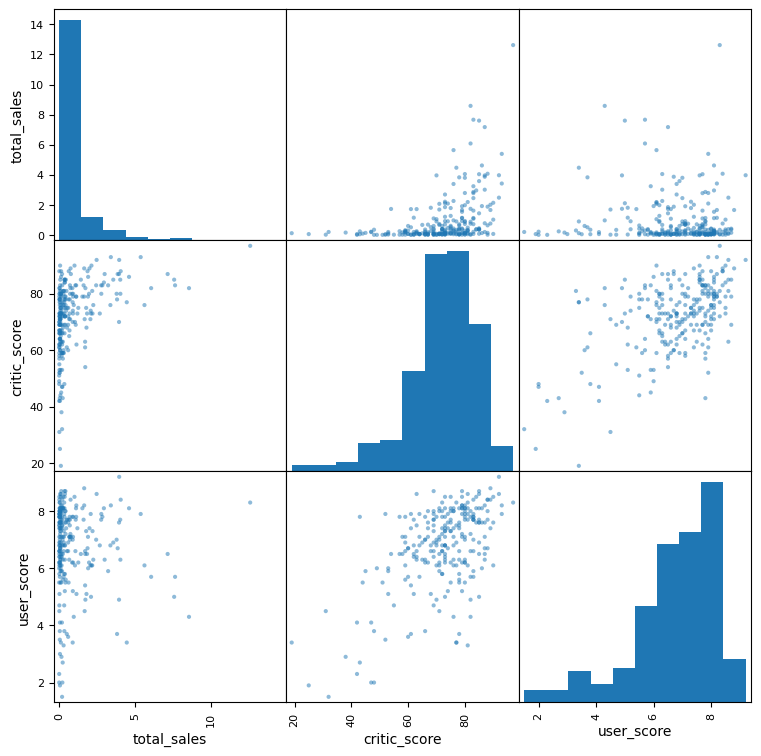

In [44]:
pd.plotting.scatter_matrix(data2.query('platform == "PS4"')\
                               [['total_sales', 'critic_score', 'user_score']],\
                               figsize=(9, 9))
plt.show()

Посчитаем корреляцию между отзывами и продажами:

In [45]:
print("Корреляция отзывов критиков и продаж для платформы PS4:", data2.query('platform == "PS4"')['total_sales'].\
                                        corr(data2.query('platform == "PS4"')['critic_score']))
print("Корреляция отзывов пользователей и продаж для платформы PS4:", data2.query('platform == "PS4"')['total_sales'].\
                                        corr(data2.query('platform == "PS4"')['user_score']))

Корреляция отзывов критиков и продаж для платформы PS4: 0.406567902061781
Корреляция отзывов пользователей и продаж для платформы PS4: -0.031957110204556376


Корреляция глобальных продаж с отзывами пользователей практически равна нулю, а с отзывами критиков равна 0.4. Отзывы пользователей никак не влияют на продажи, а отзывы критиков, возможно, имеют небольшое влияние.

Рассмотрим ещё одную крупную платформу, чтобы сделать более убедительные выводы.

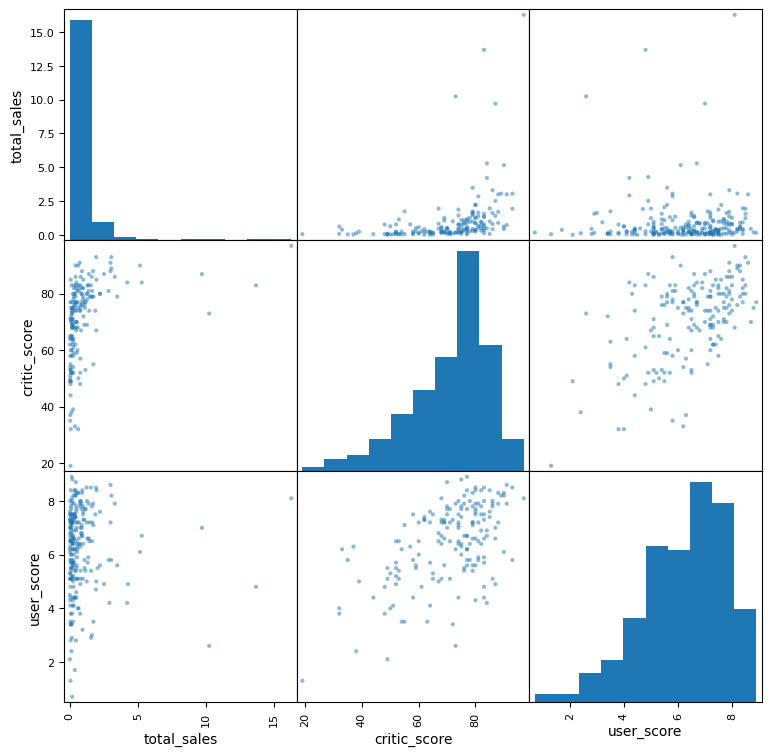

In [46]:
pd.plotting.scatter_matrix(data2.query('platform == "X360"')\
                               [['total_sales', 'critic_score', 'user_score']],\
                               figsize=(9, 9))
plt.show()

In [47]:
print("Корреляция отзывов критиков и продаж для платформы X360:", data2.query('platform == "X360"')['total_sales'].\
                                        corr(data2.query('platform == "X360"')['critic_score']))
print("Корреляция отзывов пользователей и продаж для платформы X360:", data2.query('platform == "X360"')['total_sales'].\
                                        corr(data2.query('platform == "X360"')['user_score']))

Корреляция отзывов критиков и продаж для платформы X360: 0.36057348885073365
Корреляция отзывов пользователей и продаж для платформы X360: 0.0061639786462133256


Корреляции у X360 такие же как у PS4. Можно делать окончательный вывод.

**Вывод:**   
На примере двух крупных платформ мы пришли к выводу, что отзывы критиков и пользователей **не оказывают существенного влияния на продажи игр**. При этом можно отметить, что отзывы критиков показывают небольшую положительную корреляцию с глобальными продажами.

### 3.6. Рассмотреть общее распределение игр по жанрам и основные характеристики самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Сгруппируем данные по жанрам, чтобы увидеть, объемы продаж по каждому жанру, а также сделаем столбец со средним значением продаж копий игры для каждого жанра.

In [48]:
genre_sales = data2.groupby("genre")['total_sales']\
                                                    .agg({'count', 'sum'})\
                                                    .reset_index()
genre_sales.columns = ["genre", "total_sales", "quantity"]
genre_sales['sales_per_game'] = genre_sales['total_sales'] / genre_sales['quantity']
genre_sales.sort_values(by='sales_per_game', ascending=False).reset_index(drop=True)

,genre,total_sales,quantity,sales_per_game
0,Adventure,302,29.43,10.261638
1,Puzzle,28,4.89,5.725971
2,Strategy,71,13.34,5.322339
3,Fighting,109,44.49,2.449989
4,Action,1031,441.12,2.337232
5,Simulation,80,35.12,2.277904
6,Misc,192,85.04,2.257761
7,Racing,115,53.50,2.149533
8,Role-Playing,370,192.80,1.919087
9,Sports,268,181.07,1.480091


  Рассмотрим этот же третий показатель окупаемости по трём самым прибыльным жанрам, только в разрезе по платформам.

In [49]:
top_genres = ['Shooter', 'Platform', 'Sports']

In [50]:
data2.query('genre in @top_genres').pivot_table(index='genre', columns='platform', \
                                                values='total_sales', aggfunc='mean')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Platform,1.005789,0.345,0.046667,0.387273,0.640833,NaN,0.282500,1.125000,1.266471,0.356667,0.186000
Shooter,0.065000,NaN,0.348049,1.207800,2.160000,NaN,0.585000,NaN,0.601000,1.483673,1.587632
Sports,0.352500,0.055,0.191765,0.711746,1.208913,0.141,0.152857,0.301429,0.395000,0.827045,0.703684


**Вывод**:   
   
Самые прибыльные жанры - **Shooter, Platform, Sports**.   
   
Самые низкоприбыльные жанры - **Strategy, Puzzle, Adventure**.   
    
В таблице заметно, что количество проданных копий и глобальные продажи по жанрам не коррелируют с количеством игр по данному жанру.   

На каких платформах лучшие показатели самых прибыльных жанров:
- Platform: 3DS, Wii,WiiU.   
- Shooter: PS3, PS4, X360, XOne.   
- Sports: PS3, PS4, X360, XOne.

## 4. Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):   
* Самые популярные платформы (топ-5).   
* Самые популярные жанры (топ-5). 
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### 4.1. Регион NA

Самые популярные платформы (топ-5)

In [51]:
data2.groupby('platform')['na_sales'].agg({'count', 'sum'}).sort_values(by='sum', ascending=False).reset_index().head(5)

,platform,count,sum
0,X360,292,140.05
1,PS4,392,108.74
2,PS3,493,103.38
3,XOne,247,93.12
4,3DS,396,55.31


Самые популярные жанры (топ-5)

In [52]:
data2.groupby('genre')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(5)


,genre,sum
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


Продажи по рейтингу ESRB

In [53]:
data2.groupby('rating')['na_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index()

,rating,sum
0,M,231.57
1,E,114.37
2,unknown,103.31
3,E10+,75.70
4,T,66.02


### 4.2. Регион EU

Самые популярные платформы (топ-5)

In [54]:
data2.groupby('platform')['eu_sales'].agg({'count', 'sum'}).sort_values(by='sum', ascending=False).reset_index().head(5)


,platform,count,sum
0,PS4,392,141.09
1,PS3,493,106.86
2,X360,292,74.52
3,XOne,247,51.59
4,3DS,396,42.64


Самые популярные жанры (топ-5)

In [55]:
data2.groupby('genre')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(5)

,genre,sum
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


Продажи по рейтингу ESRB

In [56]:
data2.groupby('rating')['eu_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index()

,rating,sum
0,M,193.96
1,E,113.03
2,unknown,91.50
3,E10+,55.37
4,T,52.96


### 4.3. Регион JP

Самые популярные платформы (топ-5)

In [57]:
data2.groupby('platform')['jp_sales'].agg({'count', 'sum'}).sort_values(by='sum', ascending=False).reset_index().head(5)


,platform,count,sum
0,3DS,396,87.79
1,PS3,493,35.29
2,PSV,411,21.04
3,PS4,392,15.96
4,WiiU,147,13.01


Самые популярные жанры (топ-5)

In [58]:
data2.groupby('genre')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index().head(5)


,genre,sum
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


Продажи по рейтингу ESRB

In [59]:
data2.groupby('rating')['jp_sales'].agg({'sum'}).sort_values(by='sum', ascending=False).reset_index()

,rating,sum
0,unknown,108.84
1,E,28.33
2,T,26.02
3,M,21.20
4,E10+,8.19


### 4.4. Общий вывод по портретам пользователей в регионах 

Популярность платформ:   
* Регион NA: самая популярная платформа - X360. Близкие показатели у PS4, PS3, XOne.
* Регион EU: самая популярная платформа - PS4.  Топ-5 платформ в регионах NA и EU одинаковый, отличается лишь порядок.
* Регион JP: самая популярная платформа - 3DS. X360 и XOne вообще не входит в топ-5 платформ в отличие от двух других регионов. При этом в топ-5 входит WiiU, которой непопулярна в других регионах.

Популярность жанров:   
* Регионы NA и EU: топ-5 жанров в регионах одинаковый, отличается лишь 5 позиция: в NA - это Misc, а в EU - Racing
* Регион JP: в этом регионе другая картина. Самый популярный жанр - Role-Playing. Action и Misc также в топе, однако также можно увидеть Simulation и Fighting.

Рейтинг ESRB в регионах NA и EU не влияет на продажи игр. Самые популярные игры рейтинга M (17+).   
А в регионе JP у большинства игр в принципе нет рейтинга ESRB. Игры с рейтингами 10+, 13+, 17+ встречаются практически одинаково.

## 5. Проверка гипотез

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы:   
Н0 - Средние значения пользовательских рейтингов игр у платформ Xbox One и PC в актуальном периоде равны.   
Н1 - Средние значения пользовательских рейтингов игр у платформ Xbox One и PC в актуальном периоде не равны.

В данном случае мы проверяем гипотезу о равенстве средних двух генеральных совокупностей. Используем метод st.ttest_ind()

In [60]:
from scipy import stats as st
import numpy as np

In [61]:
alpha = 0.05

results = st.ttest_ind(data2[~data2['user_score'].isna()].query('platform == "XOne"')['user_score'], \
                       data2[~data2['user_score'].isna()].query('platform == "PC"')['user_score'],\
                      equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные. 

Сформулируем нулевую и альтернативную гипотезы:   
Н0 - Средние значения пользовательских рейтингов в актуальном периоде у жанров Action и Sports равны.   
Н1 - Средние значения пользовательских рейтингов в актуальном периоде у жанров Action и Sports не равны.

In [62]:
alpha = 0.05

results = st.ttest_ind(data2[~data2['user_score'].isna()].query('genre == "Action"')['user_score'],\
                       data2[~data2['user_score'].isna()].query('genre == "Sports"')['user_score'],\
                      equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


### Вывод по статистическому анализу:   


Статистический анализ показал, что оценки пользователей для игр на платформах Xbox One и PC существенно не отличаются.      
А вот при анализе пользовательских оценок по жанрам Action и Sports мы отвергли нулевую гипотезу о равенстве средних оценок пользователей.

## Общий вывод по исследованию

В рамках нашего исследования мы пришли к следующим выводам.

1. **Самые успешные платформы за всё время - DS, PS, PS2, PS3, Wii, X360**. Эти платформы росли в продажах в течение 3-5 лет, а уходили с рынка в течение 4-5 лет.
2. **Актуальный период** для составления прогноза на 2017 год - **2012-2017 годы**. До этого периода данные показывают резкий скачок выпуска видеоигр, который закончился примерно к 2012 году.   
3. Потенциальные платформы, на которые стоит обратить внимание в 2017 году - **PS4 и XOne**.   
4. Самая высокие показатели проданных копий видеоигр у X360, Wii, WiiU, PS3, PS4, XOne. Самые худшие показатели у PSV и PSP.
5. **Отзывы критиков имеют небольшую положительную корреляцию с глобальными продажами**. При этом нельзя сказать, что критики влияют на уровень продаж видеоигр:   
        1) показатель корреляции несущественный, около 0.4;   
        2) большие продажи успешных видеоигр могут обуславливаться другими факторами.       
   
6. Самые прибыльные жанры - **Shooter, Platform, Sports**, а самые низкоприбыльные жанры - **Strategy, Puzzle, Adventure**. Жанры Shooter и Sports популярны на обоих потенциальных платформах.   
7. **На продажи в отдельных регионах влияет игровая платформа**. Самая лучшая продаваемость игр в регионе NA на платформу X360, в регионе EU на PS4, а в регионе JP - 3DS. Топ-5 платформ в регионах NA и EU одинаковый, отличается лишь порядок, а в регионе JP X360 и XOne  не входит в топ-5 платформ, но есть WiiU, которая непопулярна в других регионах.
8. **Жанровые преподчтения в регионах NA и EU одинаковые, а в регионе JP отличаются**.
9. Статистический анализ показал:
    * средние показатели пользовательских рейтингов у платформ Xbox One и PC существенно не отличаются;   
    * средние показатели пользовательских рейтингов у жанров Action и Sports существенно отличаются.   